In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1FEmnhZ8gcJSI8s-W9tqYgDKkhRS21b1t9LZeKG6Xjd6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'telcocustomerchurnprediction-donotdelete-pr-lmlnuhnfbgltbz'
object_key = 'WA_Fn-UseC_-Telco-Customer-Churn[1].csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head(10)



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
# Dropping customerID feature(column) As customerID feature does not contribute to the churn column
dataset=dataset.drop('customerID', axis=1)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

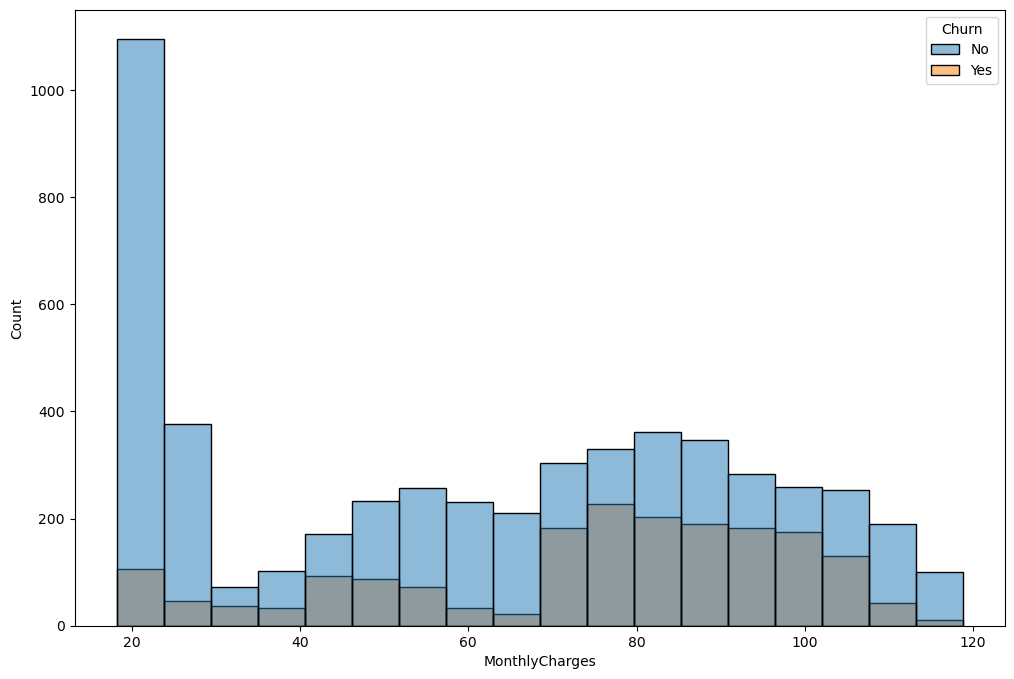

In [6]:
# How much affect MonthlyCharges on Churn
plt.figure(figsize=(12,8))
sns.histplot(x='MonthlyCharges',data=dataset,hue='Churn')

<Axes: xlabel='Churn', ylabel='count'>

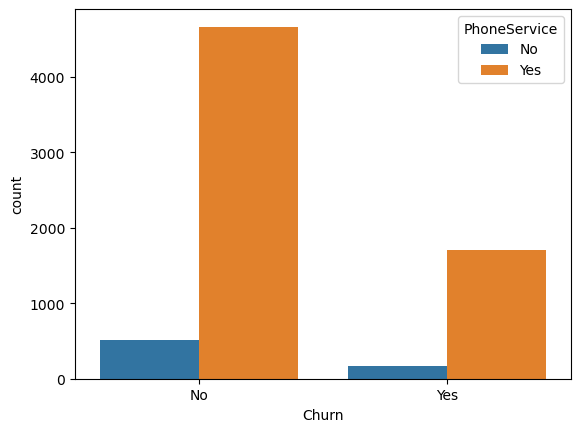

In [7]:
# Effect of Phone Service on target(Churn)
sns.countplot(data=dataset,x='Churn',hue='PhoneService')

<Axes: xlabel='InternetService', ylabel='count'>

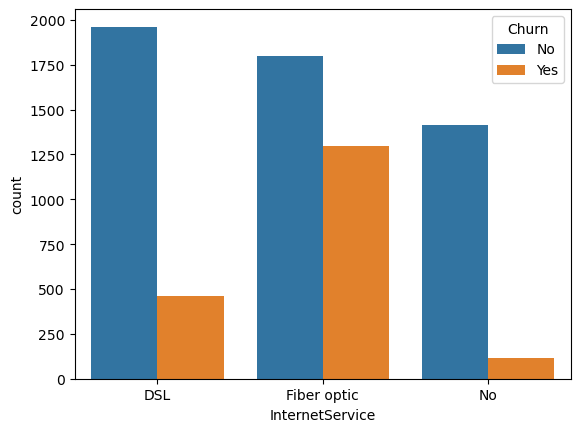

In [8]:
# Effect of Internet Service on target(Churn)
sns.countplot(x='InternetService',data=dataset,hue='Churn')

<Axes: xlabel='Contract', ylabel='count'>

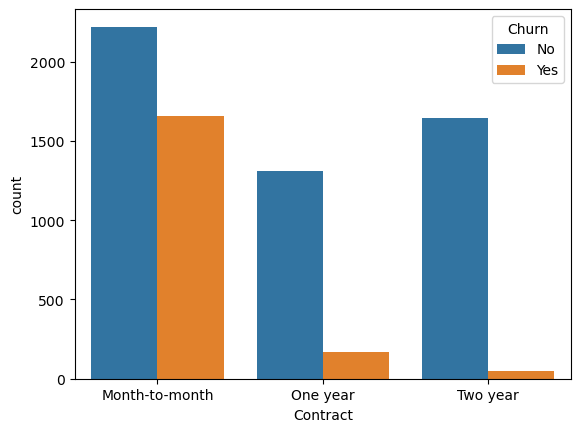

In [9]:
# Effect of Contract on target(Churn)
sns.countplot(x='Contract',data=dataset,hue='Churn')

# Data Preprocessing

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
totalCharges = dataset.columns.get_loc("TotalCharges")
new_col = pd.to_numeric(dataset.iloc[:, totalCharges], errors='coerce')
dataset[dataset.columns[totalCharges]] = pd.Series(new_col)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
# Checking for null values
print(dataset.isnull().values.any())
dataset.isnull().sum()

True


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Hadling the NULL values using SimpleImputer replacing with mean value of the column

In [14]:
# Handle missing values for nan_column (TotalCharges)
from sklearn.impute import SimpleImputer

# Find the column number for TotalCharges (starting at 0).
total_charges_idx = dataset.columns.get_loc("TotalCharges")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

dataset.iloc[:, total_charges_idx] = imputer.fit_transform(dataset.iloc[:, total_charges_idx].values.reshape(-1, 1))
dataset.iloc[:, total_charges_idx] = pd.Series(dataset.iloc[:, total_charges_idx])

In [15]:
# Final check to ensure there are no NULL values remaining
print(dataset.isnull().values.any())
dataset.isnull().sum()

False


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### We will encode columns having only two unique values as 0 and 1 and perform one hot encoding on values having more than 2 values

In [16]:
# Define category maps
Gender_Category_map = {
    'Male' : 1,
    'Female': 0,
}

Partner_Category_map = {
    'Yes' : 1,
    'No': 0,
}

Dependents_Category_map = {
    'Yes' : 1,
    'No': 0,
}

PhoneService_Category_map = {
    'Yes' : 1,
    'No': 0,
}

PaperlessBilling_Category_map = {
    'Yes' : 1,
    'No': 0,
}

Churn_Category_map = {
    'Yes' : 1,
    'No': 0,
}

# Apply mappings to respective columns using .map() method with fillna
dataset['gender'] = dataset['gender'].map(Gender_Category_map).fillna(dataset['gender'])
dataset['Partner'] = dataset['Partner'].map(Partner_Category_map).fillna(dataset['Partner'])
dataset['Dependents'] = dataset['Dependents'].map(Dependents_Category_map).fillna(dataset['Dependents'])
dataset['PhoneService'] = dataset['PhoneService'].map(PhoneService_Category_map).fillna(dataset['PhoneService'])
dataset['PaperlessBilling'] = dataset['PaperlessBilling'].map(PaperlessBilling_Category_map).fillna(dataset['PaperlessBilling'])
dataset['Churn'] = dataset['Churn'].map(Churn_Category_map).fillna(dataset['Churn'])

In [17]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [18]:
# Splitting The dataset into x(Feature Matrix) and y(Target)
y=np.array(dataset['Churn'])
print(type(y))
print(y)

<class 'numpy.ndarray'>
[0 0 1 ... 0 1 0]


### Performing One Hot Encoding on the entire dataset then we will remove target (Churn) from the dataset so that we get the feature matrix

In [19]:
dataset=pd.get_dummies(dataset)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [20]:
dataset.pop('Churn')
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7043 non-null   float64
 9   MultipleLines_No                         7043 non-null   uint8  
 10  MultipleLines_No phone service           7043 no

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


### Now converting dataset to feature matrix of type numpy array

In [21]:
x=np.array(dataset)
type(x)
print(x)
print(y)

[[0. 0. 1. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]
[0 0 1 ... 0 1 0]


### Spliting the Dataset into train and test set

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

### Transforming the the MonthlyCharges and TotalCharges Features using Standard Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,7:9] = sc.fit_transform(x_train[:,7:9])
x_test[:,7:9] = sc.transform(x_test[:,7:9])

In [24]:
print("x_train = ",x_train)
print("y_train = ",y_train)
print("x_test = ",x_test)
print("y_test = ",y_test)

x_train =  [[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]
y_train =  [0 1 0 ... 1 1 0]
x_test =  [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]]
y_test =  [0 0 0 ... 0 0 1]


# KNN Model

### Checking for which K-value accuracy is Higher in KNN model

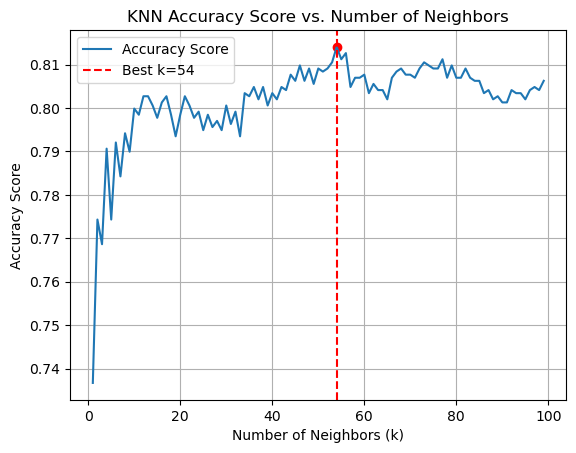

The maximum accuracy score of 0.81 is achieved at k = 54.


In [25]:
import warnings
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy import stats

# Assuming x_train, y_train, x_test, y_test are defined and initialized with appropriate data

# Suppress the warning related to mode function in SciPy
warnings.filterwarnings("ignore", category=FutureWarning)

# Initialize an empty list to store accuracy scores
scores = []

# Iterate over a range of k values from 1 to 90
for k in range(1, 100):
    # Create a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier on the training data
    knn.fit(x_train, y_train)
    
    # Predict the labels of the test set
    y_pred = knn.predict(x_test)
    
    # Calculate the accuracy score of the model
    score = accuracy_score(y_test, y_pred)
    
    # Append the accuracy score to the scores list
    scores.append(score)

max_score = max(scores)
best_k = scores.index(max_score) + 1  # +1 because range starts from 1

# Plot the accuracy scores against the number of neighbors (k)
plt.plot(range(1, 100), scores, label='Accuracy Score')
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k={best_k}')
plt.scatter(best_k, max_score, color='red')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.title('KNN Accuracy Score vs. Number of Neighbors')
plt.grid(True)
plt.legend()
plt.show()

print(f"The maximum accuracy score of {max_score:.2f} is achieved at k = {best_k}.")

### Training the KNN model on the Training Set

In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=54,metric='minkowski',p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=54)

In [27]:
y_pred = classifier.predict(x_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("\n")
print("MODEL ACCURACY : ",accuracy_score(y_test, y_pred)*100)

[[961 100]
 [162 186]]


MODEL ACCURACY :  81.40525195173882


### Classification Report

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1061
           1       0.65      0.53      0.59       348

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.81      0.81      0.81      1409



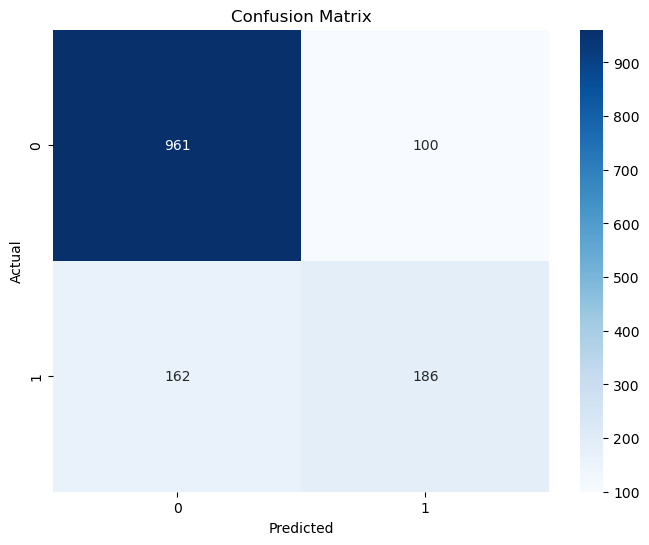

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()